<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto; background-color:off white; position: relative;">
  <div class="alert alert-block alert-success" style="text-align:center; color:white; background-color:#1e2124 !important;">
    <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
    <h1>Universidade de Brasília</h1>
    <h2>Instituto de Física</h2>
    <hr style="width:44%;border:1px solid white;">
    <h3>Mini Curso de Inteligência Artificial para a Física</h3> 
    <h4>Henrique de Oliveira Noronha</h4>
    <hr style="width:44%;border:1px solid white;">
  </div>
  <img src="https://raw.githubusercontent.com/monnomero/IA-para-fisica/main/Imagens/logo_if.png" style="position: absolute; bottom: 20px; left: 40px; width: 100px;">
</div>


# **➲ Tarefa 2 - Abordando séries temporais com redes neurais**
---


O atrator de Lorenz é famoso por apresentar comportamento caótico, isto é, ao pegarmos 2 condições iniciais próximas, seus comportamentos divergem exponencialmente ao longo do tempo. Dessa forma, esse problema é um bom desafio para testar as redes neurais. Utilize os código abaixo para gerar os dados de treinamento, validação e teste. Então, treine um modelo LSTM que tem como entrada 10 posições $[(x_i,y_i,z_i),(x_{i+1},y_{i+1},z_{i+1}),...]$ e preveja a próxima posição $(x_{i+10},y_{i+10},z_{i+10})$, utilizando tanto os dados de treinamento quanto os de validação. Por fim, utilize o metodo evaluate nos dados de teste.

Observe que os dados de treinamento são simulações até 1 segundo, isso é para que o problema não chegue a ficar muito caótico. 

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [48]:
def criar_sequencias(X, N_intervalos):
    sequencias_entrada = []
    sequencias_saida = []
    L = X.shape[0]
    for i in range(L-N_intervalos):
        entrada = X[i:i+N_intervalos,:]
        saida = X[i+N_intervalos:i+N_intervalos+1,:]
        sequencias_entrada.append(entrada)
        sequencias_saida.append(saida)  
    return np.array(sequencias_entrada), np.squeeze(np.array(sequencias_saida),axis=1) # Squeeze para corrigir o shape das saídas para ser (batches,features), sem ele fica (batches,1,features)


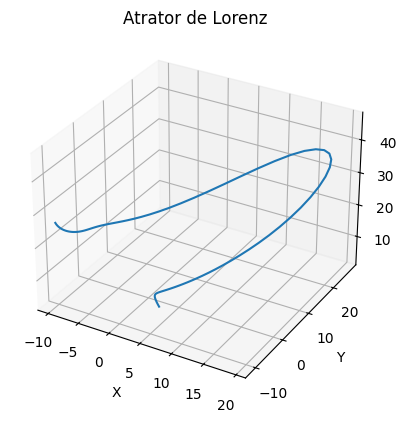

In [98]:
def lorenz(t,pos,sigma,rho,beta):
    x,y,z = pos
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return [dxdt,dydt,dzdt]
sigma = 10.0
rho = 28.0
beta = 8/3

t_final = 1
tempo = np.arange(0,t_final,0.01)

entradas_treinamento = []
saidas_treinamento = []
entradas_validacao = []
saidas_validacao = []
entradas_teste = []
saidas_teste = []

# Gerar dados de treinamento e validação no intervalo das posições entre -3 e 3
for i in range(100):
    y0 = np.random.uniform(-3,3,size=3)
    solucao = solve_ivp(lorenz,t_span=(0, t_final), y0=y0,t_eval=tempo,args=(sigma, rho, beta)).y.T # Resolve o problema com as condições inciais aleatórias de t=0 a t=1
    entradas,saidas = criar_sequencias(solucao,10) # Cria sequências com 10 pontos
    if i<75:
        entradas_treinamento.append(entradas)
        saidas_treinamento.append(saidas)
    else:
        entradas_validacao.append(entradas)
        saidas_validacao.append(saidas)

# Gerar dados de teste no intervalo das posições com valores absolutos maiores que 3
for i in range(30):
    y0 = np.random.uniform(3,4,size=3)
    y0 = y0[0]*np.random.choice((-1,1)),y0[1]*np.random.choice((-1,1)),y0[2]*np.random.choice((-1,1)) # Fazer com que a posição possa ser positiva ou negativa
    positivo_ou_negativo = np.random.uniform

    solucao = solve_ivp(lorenz,t_span=(0, t_final), y0=y0,t_eval=tempo,args=(sigma, rho, beta)).y.T # Resolve o problema com as condições inciais aleatórias de t=0 a t=1
    entradas,saidas = criar_sequencias(solucao,10) # Cria sequências com 10 pontos
    entradas_teste.append(entradas)
    saidas_teste.append(saidas)


entradas_treinamento = np.concat(entradas_treinamento)
saidas_treinamento = np.concat(saidas_treinamento)
entradas_validacao = np.concat(entradas_validacao)
saidas_validacao = np.concat(saidas_validacao)
entradas_teste = np.concat(entradas_teste)
saidas_teste = np.concat(saidas_teste)

ax = plt.figure().add_subplot(projection='3d')

ax.plot(*solucao.T, lw=1.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atrator de Lorenz")

plt.show()

In [99]:
#Seu código vem aqui